### Import Libraries

In [1]:
%matplotlib inline
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.cluster import KMeans
import random

### Load Data

In [2]:
Data=pd.read_csv('faithful.csv')
Data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [3]:
X=Data.values

### Visualize Data

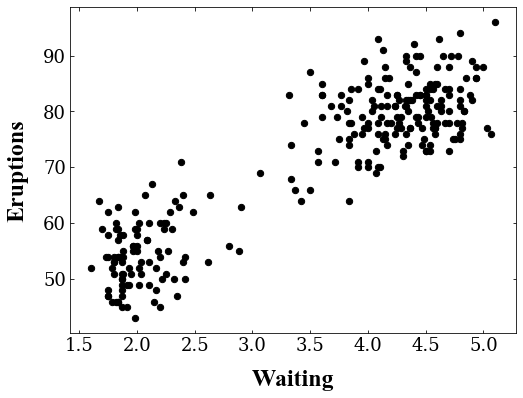

In [4]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Waiting', fontsize=24, **csfont)
plt.ylabel('Eruptions', fontsize=24, **csfont)
plt.scatter(X[:,0], X[:,1], color='black', s=40)

## Sklearn benchmark clustering

In [5]:
X=StandardScaler().fit_transform(X) #First it's better to standardize data

 ### Useing Sklearn Library for clustering and finding the optimum clusters using silhouette score

In [6]:
km_silhouette = []
for i in range(2,10):
    km = KMeans(init='k-means++', n_clusters=i, n_init=20, random_state=30, tol=0.0000001).fit(X)
    preds = km.predict(X)
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)

([<matplotlib.axis.XTick at 0x1c61ebab780>,
 <a list of 4 Text xticklabel objects>)

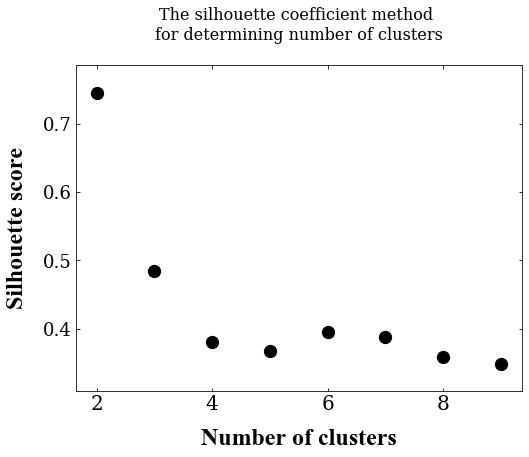

In [7]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,color='k')
plt.xlabel("Number of clusters",fontsize=24, **csfont)
plt.ylabel("Silhouette score",fontsize=24, **csfont)
plt.xticks([i for i in range(2,10,2)],fontsize=20)


 ### Looks like we have a winner n_clusters=2

In [8]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100, random_state=30, tol=0.000001)
y_pred = kmeans.fit_predict(X)

Text(0, 0.5, 'Eruptions')

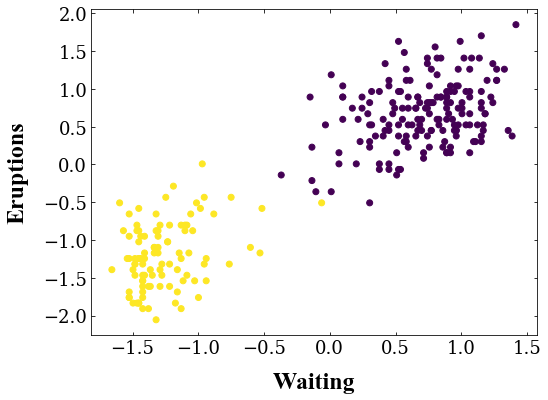

In [9]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))



plt.scatter(X[:,0], X[:,1],c=y_pred )
plt.xlabel('Waiting', fontsize=24, **csfont)
plt.ylabel('Eruptions', fontsize=24, **csfont)

## Kmean algorithm implementation

inputs: X, n_init (number of times for centroid initialization), max_iteration (integer), tol (float smaller than one), boolean variable plot to allow plotting steps,random_state

In [10]:
class MyKmean:
    def __init__(self): 
        pass
    
    def fit(self,X,k,n_init=10, max_iteration=1, tol=0.000001,plot=True, random_state=0):
        random.seed(random_state)
        n,m = X.shape
        C=np.zeros((k,m))
        C1=np.zeros((k,m,n_init))
        
        D=np.zeros((X.shape[0],k))
        labels=np.zeros(X.shape[0])
        
        #initialized centriods
        for ini in range(n_init):
            for i in range (m):
                C1[:,i,ini]=np.random.uniform(np.min(X[:,i]), np.max(X[:,i]),k)

        C=np.mean(C1,axis=2)
        d=1
        l=0
        while (l< max_iteration) & (d>tol):
            

            C_old=C
            
            if plot==True:
                csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
                plt.rc('font', family='serif') 
                plt.rc('axes', labelpad=15 )
                plt.rc('xtick', labelsize=18, direction='in',top=True) 
                plt.rc('ytick', labelsize=18, direction='in', right=True) 
                plt.figure(figsize=(8,6))
                plt.xlabel('Waiting', fontsize=24, **csfont)
                plt.ylabel('Eruptions', fontsize=24, **csfont)
                plt.scatter(X[:, 0], X[:, 1], s=90, c=labels)
                plt.scatter(C[:,0],C[:,1], s=100, c=np.arange(0,k))
                plt.show()

            for cluster in range(k):
                D[:,cluster]=np.sum(np.square(X-C[cluster,0:m]),axis=1)

            labels=np.argmin(D, axis=1)

            C_new=np.zeros((k,m))
            for cluster in range(k):
                if len(X[np.argmin(D, axis=1)==cluster])>0:
                    C_new[cluster,:]=np.mean(X[np.argmin(D, axis=1)==cluster], axis=0)
            d=np.sum(np.square(C_old-C_new))
            C=C_new
            l=l+1
            
            
    def fit_predict(self,X,k,n_init=10, max_iteration=10, tol=0.000001, random_state=0):
        random.seed(random_state)
        n,m = X.shape
        C=np.zeros((k,m))
        C1=np.zeros((k,m,n_init))
        
        D=np.zeros((X.shape[0],k))
        labels=np.zeros(X.shape[0])
        
        #initialized centriods
        for ini in range(n_init):
            for i in range (m):
                C1[:,i,ini]=np.random.uniform(np.min(X[:,i]), np.max(X[:,i]),k)

        C=np.mean(C1,axis=2)
        d=1
        l=0
        while (l< max_iteration) & (d>tol):

            C_old=C
            for cluster in range(k):
                D[:,cluster]=np.sum(np.square(X-C[cluster,0:m]),axis=1)

            labels=np.argmin(D, axis=1)

            C_new=np.zeros((k,m))
            for cluster in range(k):
                if len(X[np.argmin(D, axis=1)==cluster])>0:
                    C_new[cluster,:]=np.mean(X[np.argmin(D, axis=1)==cluster], axis=0)
            d=np.sum(np.square(C_old-C_new))
            C=C_new
            l=l+1
        return labels
        

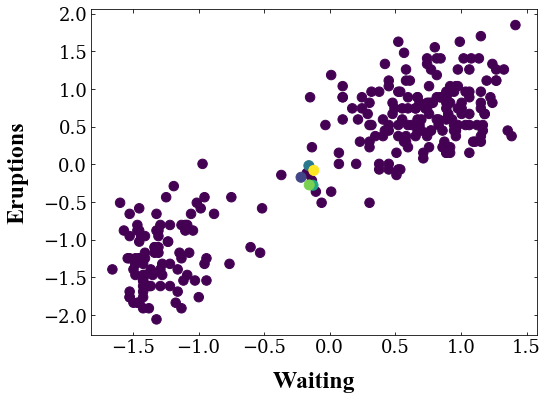

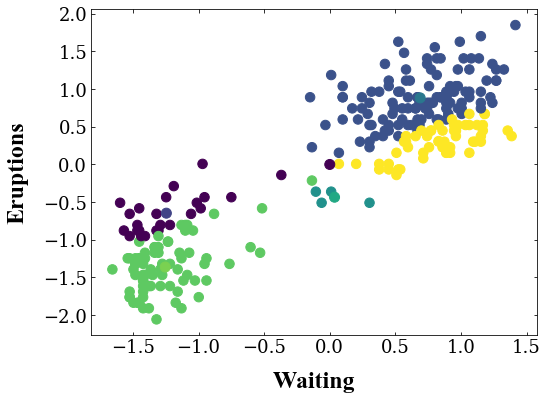

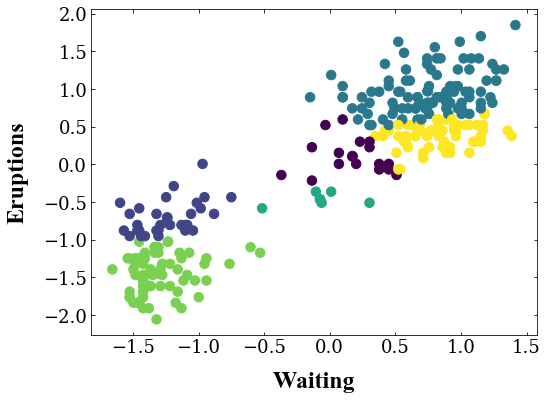

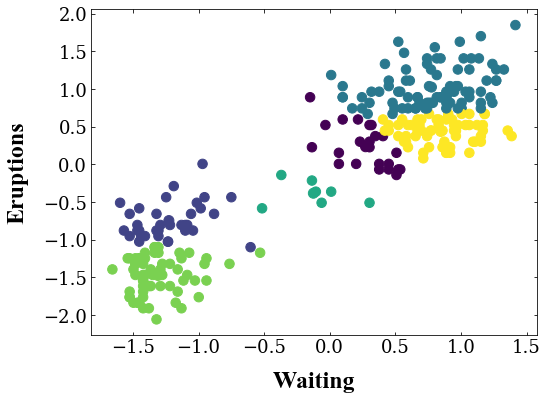

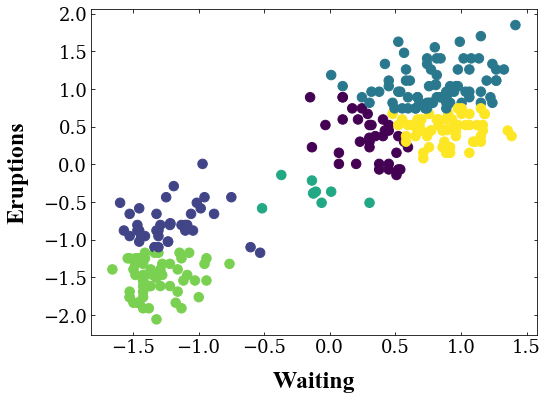

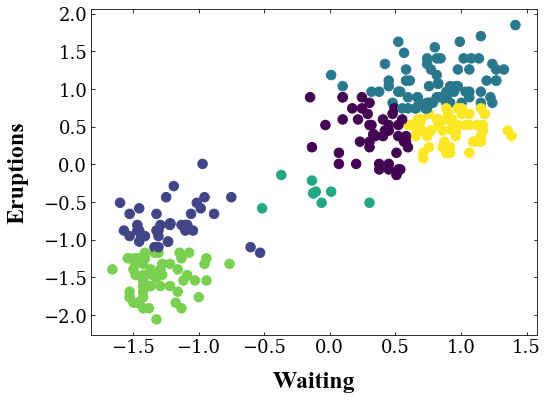

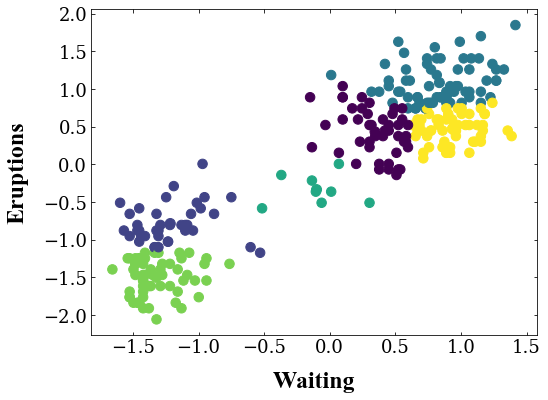

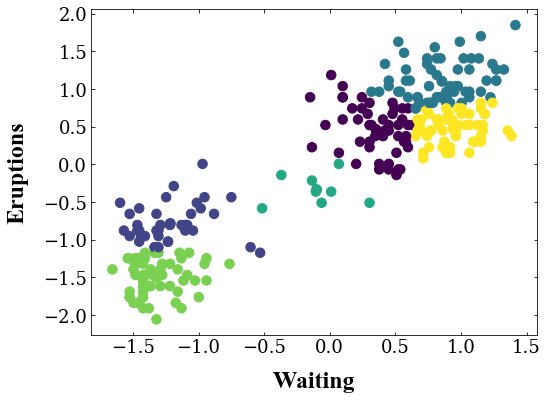

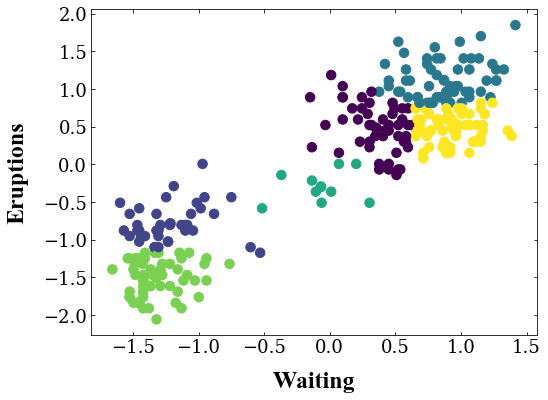

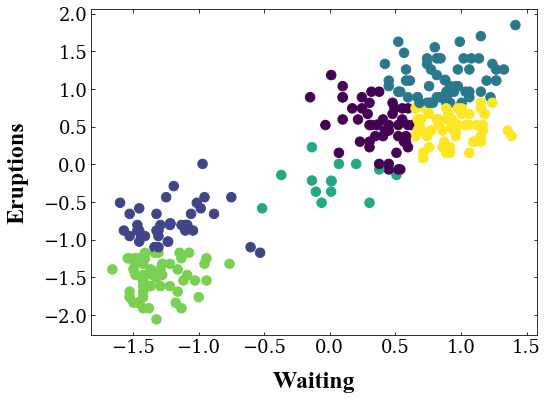

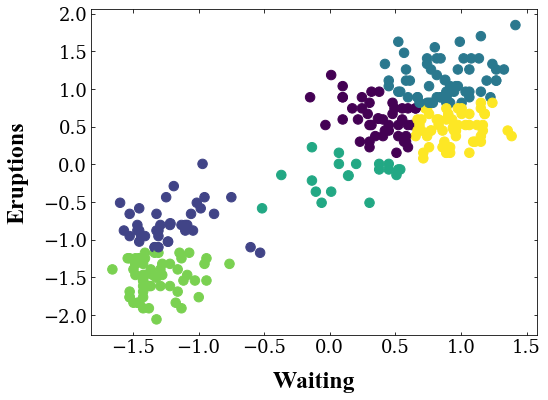

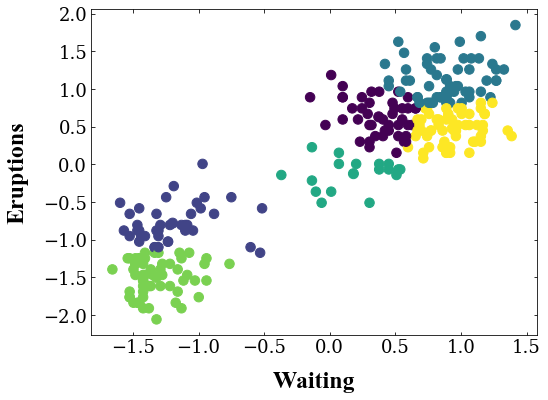

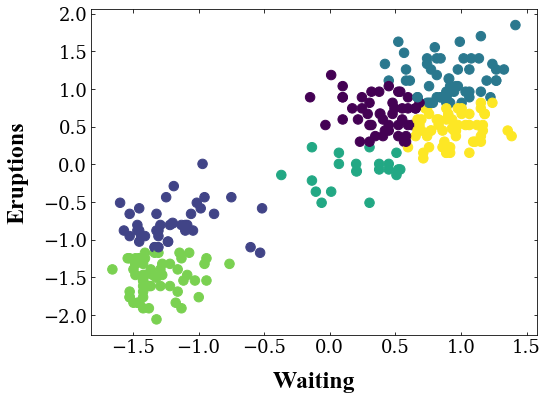

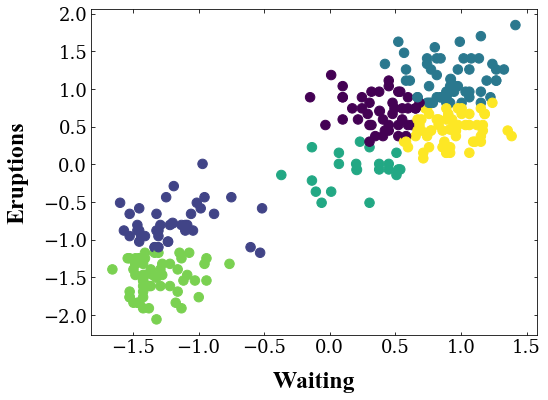

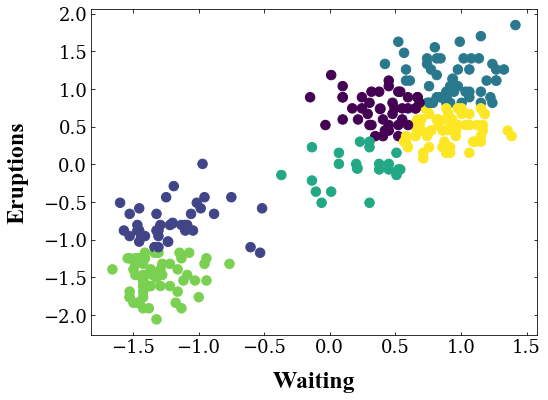

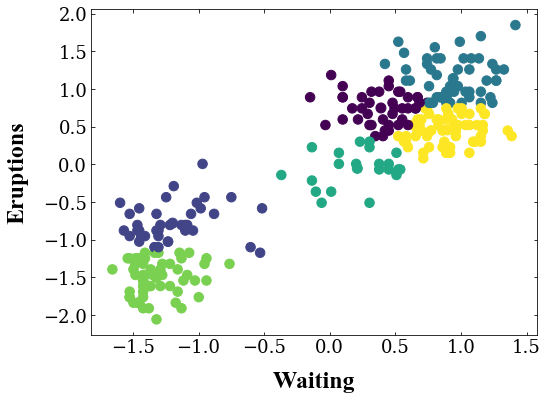

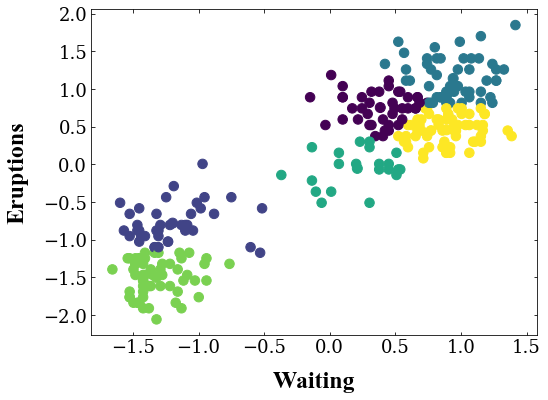

In [11]:
MyKmean().fit(X,k=6,n_init=100, max_iteration=100, tol=0.00001,plot=True, random_state=0)

### Find optimum number of clusters using my algorithm and silhouette score

In [12]:
km_silhouette = []
for i in range(2,10):
    preds = MyKmean().fit_predict(X,i,n_init=100, max_iteration=100, tol=0.00000001,random_state=0)
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)

([<matplotlib.axis.XTick at 0x1c620e8df60>,
 <a list of 8 Text xticklabel objects>)

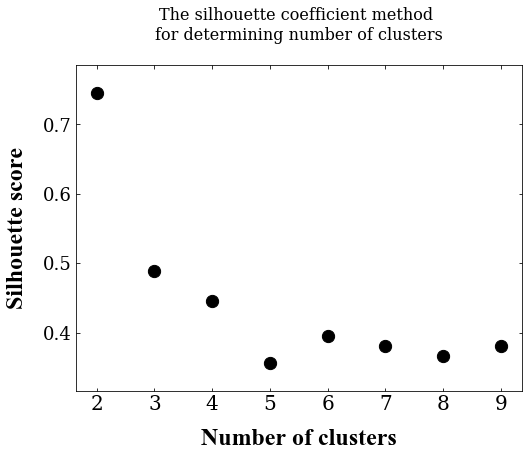

In [13]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,color='k')
plt.xlabel("Number of clusters",fontsize=24, **csfont)
plt.ylabel("Silhouette score",fontsize=24, **csfont)
plt.xticks([i for i in range(2,10,1)],fontsize=20)

# Similar results to sklearn library